<a href="https://colab.research.google.com/github/plask3189/Example1/blob/master/Copy_of_MNIST_HelloWorld_DLinColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare the workspace - load Keras, Tensorflow

In [16]:
from __future__ import print_function
import keras
from keras import utils
from keras.utils import plot_model
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import backend as K
import matplotlib.pyplot as plt

# Import the MNIST dataset + create variables for our test and training data

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
Note we do shape it into a 1D vector of size 28*28 = 784 here.

Compare this preprocessing steps in the code MNIST_CNN_HelloWorld_DLinR code!


In [18]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

### rescale

In [19]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 784)
60000 train samples
10000 test samples


## The y data is an integer vector with values ranging from 0 to 9.  To prepare this data for training we one-hot encode the vectors into binary class matrices

In [20]:
# One hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Build the model
Building the neural network requires configuring the layers of the model then compiling the model.

# Setup the layers

In [21]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape = (784,))) #256 nodes
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax')) # 10 nodes because 10 classes

# Print the details of the model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


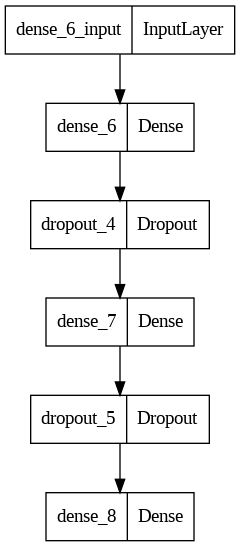

In [22]:
#keras.utils.print_summary(model)
model.summary()
# You can also plot instead
keras.utils.plot_model(model)

# Compile the model - define loss and optimizer

In [23]:
model.compile(
  loss='categorical_crossentropy',
  optimizer= 'adam', # or sgd
  metrics='accuracy'
  )

# Train the model

In [24]:
history = model.fit(
  x_train, y_train,
  epochs=5, batch_size=128,
  validation_split=0.2
)

Epoch 1/5
375/375 [==============================] - 3s 5ms/step - loss: 0.4574 - accuracy: 0.8598 - val_loss: 0.1660 - val_accuracy: 0.9503
Epoch 2/5
375/375 [==============================] - 2s 4ms/step - loss: 0.2016 - accuracy: 0.9390 - val_loss: 0.1149 - val_accuracy: 0.9653
Epoch 3/5
375/375 [==============================] - 2s 6ms/step - loss: 0.1565 - accuracy: 0.9524 - val_loss: 0.1053 - val_accuracy: 0.9680
Epoch 4/5
375/375 [==============================] - 2s 4ms/step - loss: 0.1284 - accuracy: 0.9615 - val_loss: 0.0933 - val_accuracy: 0.9711
Epoch 5/5
375/375 [==============================] - 2s 4ms/step - loss: 0.1083 - accuracy: 0.9671 - val_loss: 0.0873 - val_accuracy: 0.9748


## The history object returned by fit() includes loss and accuracy metrics which we can plot

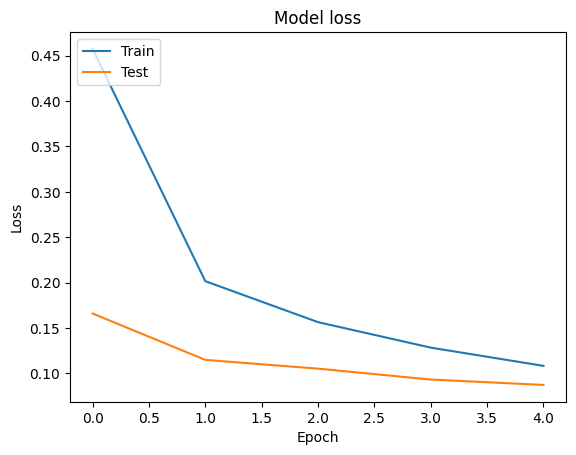

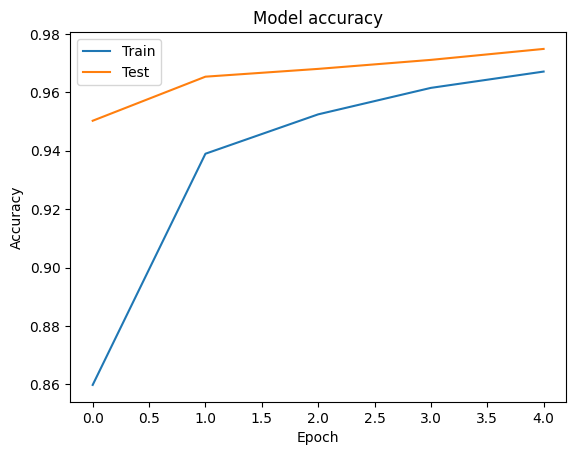

In [25]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### evaulating result

In [26]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07727210968732834
Test accuracy: 0.9763000011444092
